<a href="https://colab.research.google.com/github/akznsk1/hello-world/blob/master/200301.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mwakuna","key":"b0417f7dc9aa49cdc196aef7e20dc64a"}'}

In [0]:
ls -1ha kaggle.json

kaggle.json


In [0]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
# Permission Warning 이 일어나지 않도록 
!chmod 600 ~/.kaggle/kaggle.json
# 본인이 참가한 모든 대회 보기 
!kaggle competitions list

ref                                                                deadline             category             reward  teamCount  userHasEntered  
-----------------------------------------------------------------  -------------------  ---------------  ----------  ---------  --------------  
digit-recognizer                                                   2030-01-01 00:00:00  Getting Started   Knowledge       2266           False  
titanic                                                            2030-01-01 00:00:00  Getting Started   Knowledge      16242            True  
house-prices-advanced-regression-techniques                        2030-01-01 00:00:00  Getting Started   Knowledge       4615            True  
connectx                                                           2030-01-01 00:00:00  Getting Started   Knowledge        478           False  
competitive-data-science-predict-future-sales                      2020-12-31 23:59:00  Playground            Kudos       5847    

In [0]:
!kaggle competitions download -c porto-seguro-safe-driver-prediction

 57% 17.0M/30.0M [00:00<00:00, 49.8MB/s]
100% 30.0M/30.0M [00:00<00:00, 99.8MB/s]
 74% 33.0M/44.4M [00:00<00:00, 39.0MB/s]
100% 44.4M/44.4M [00:00<00:00, 89.7MB/s]
  0% 0.00/2.12M [00:00<?, ?B/s]
100% 2.12M/2.12M [00:00<00:00, 142MB/s]


In [0]:
!ls

kaggle.json  sample_submission.csv.zip	train.csv.zip
sample_data  test.csv.zip


In [0]:
!unzip train.zip

unzip:  cannot find or open train.zip, train.zip.zip or train.zip.ZIP.


In [0]:
!unzip train.csv.zip

Archive:  train.csv.zip
  inflating: train.csv               


In [17]:
# 모듈 생성
import numpy as np
import pandas as pd

# 데이터생성

df_train =  pd.read_csv('../train.csv')

FileNotFoundError: ignored

In [3]:
import os
print(os.getcwd())
!ls

# 실행시 등장하는 URL을 클릭하여 허용해주면 인증KEY가 나타난다. 복사하여 URL아래 빈칸에 붙여넣으면 마운트에 성공하게된다.
from google.colab import drive
drive.mount('./MyDrive')

/content
sample_data
Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at ./MyDrive


In [4]:
!ls

MyDrive  sample_data


In [5]:
cd MyDrive/My Drive

/content/MyDrive/My Drive


In [10]:
ls

 01_강의소개.mp4
'02_전문성에 대한 미신들 (1).mp4'
'03_전문성에 대한 미신들 (2).mp4'
'04_전문성에 대한 과학적 근거들.mp4'
'05_질답 OOP와 영어공부, 코드 읽기 실력.mp4'
'06_의도적 수련의 조건(1)-새로운 프로그래밍 언어 배우기를 중심으로.mp4'
'06- 적절한 난이도 관련 참고 글.txt'
'07_의도적 수련의 조건(2)-새로운 프로그래밍 언어 배우기를 중심으로.mp4'
'08_질답 낯선기술-짝프로그래밍-영어-강의듣기.mp4'
'08 질답- 낯선기술, 짝프로그래밍, 영어, 강의듣기.txt'
'09_프로그래밍하는 사람을 위한 효과적 학습법 (1)-교육심리학의 최근 연구 적용하기.mp4'
'10_프로그래밍하는 사람을 위한 효과적 학습법 (2) - 프로그래밍 순서.mp4'
'Colab Notebooks'/
 프로그래밍+어떻게+공부할+것인가+요약.pdf
'프로그래머에게 적합한 의도적 수련.pdf'
 train.csv


In [0]:
import pandas as pd
df_train = pd.read_csv('./train.csv')

Class 0: 573518
Class 1: 21694
Propertion: 26.44 :1


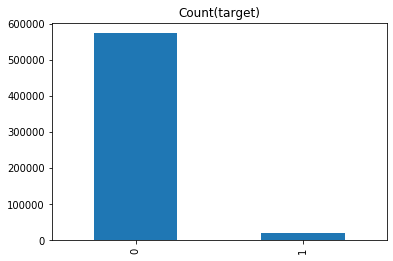

In [16]:
target_count = df_train.target.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Propertion:', round(target_count[0]/ target_count[1], 2), ':1')
target_count.plot(kind='bar', title='Count(target)');

In [22]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

labels = df_train.columns[2:]

X = df_train[labels]
y = df_train['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print('Accuracy: %.2f%%' % (accuracy*100.0))


Accuracy: 96.36%


In [23]:
model = XGBClassifier()
model.fit(X_train[['ps_calc_01']], y_train)
y_pred = model.predict(X_test[['ps_calc_01']])

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:. %2.f%%' % (accuracy * 100.0))

Accuracy:. 96%


Confusion matrix:
 [[114709      0]
 [  4334      0]]


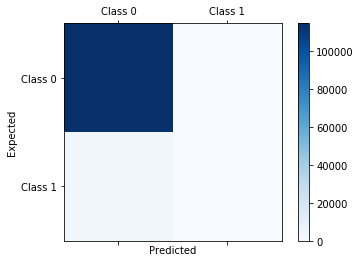

In [24]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

conf_mat = confusion_matrix(y_true=y_test, y_pred = y_pred)
print('Confusion matrix:\n', conf_mat)

labels = [ 'Class 0', 'Class 1']
fig = plt.figure()
ax= fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)

ax.set_yticklabels([''] + labels)
ax.set_xticklabels([''] + labels)

plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()


In [0]:
count_class_0, count_class_1 = df_train.target.value_counts()

df_class_0 = df_train[df_train['target'] == 0]
df_class_1 = df_train[df_train['target'] == 1]

Random under-sampling:
1    21694
0    21694
Name: target, dtype: int64


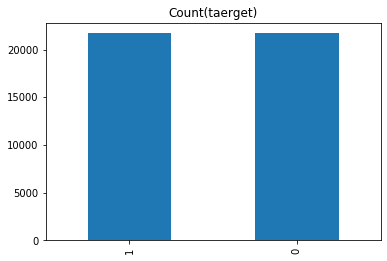

In [29]:
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under.target.value_counts())

df_test_under.target.value_counts().plot(kind='bar', title='Count(taerget)');

Random ove-sampling:
1    573518
0    573518
Name: target, dtype: int64


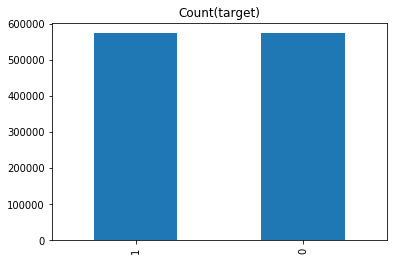

In [33]:
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random ove-sampling:')
print(df_test_over.target.value_counts())

df_test_over.target.value_counts().plot(kind='bar', title='Count(target)');


In [34]:
import imblearn

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


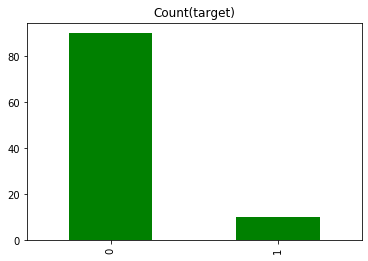

In [40]:
from sklearn.datasets import make_classification

X, y = make_classification(
    n_classes=2, class_sep=1.5, weights=[0.9, 0.1],
    n_informative=3, n_redundant=1, flip_y=0,
    n_features=20, n_clusters_per_class=1,
    n_samples=100, random_state=10
)
df = pd.DataFrame(X)

df['target'] = y

df.target.value_counts().plot(kind='bar', title='Count(target)',color='green');

In [0]:
def plot_2d_space(X, y, label='Classes'):   
    colors = ['#1F77B4', '#FF7F0E']
    markers = ['o', 's']
    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(
            X[y==l, 0],
            X[y==l, 1],
            c=c, label=l, marker=m
        )
    plt.title(label)
    plt.legend(loc='upper right')
    plt.show()

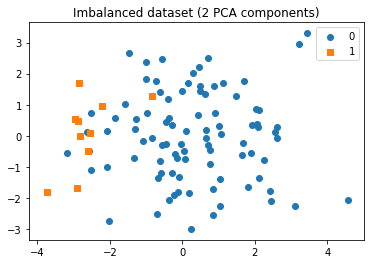

In [49]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X = pca.fit_transform(X)

plot_2d_space(X, y, 'Imbalanced dataset (2 PCA components)')

In [0]:
import numpy as np

80 new random picked points


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


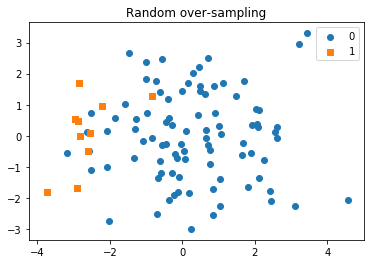

In [50]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()

X_ros , y_ros = ros.fit_sample(X,y)

print(X_ros.shape[0] - X.shape[0], 'new random picked points')

plot_2d_space(X_ros, y_ros, 'Random over-sampling')

Removed indexes: [ 0  1  2  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73
 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 90 91 92 93 94 95 97 98 99]


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


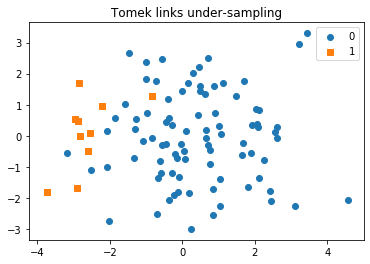

In [51]:
from imblearn.under_sampling import TomekLinks

tl = TomekLinks(return_indices=True, ratio = 'majority')
X_tl, y_tl, id_tl = tl.fit_sample(X,y)

print('Removed indexes:', id_tl)

plot_2d_space (X_tl, y_tl, 'Tomek links under-sampling')

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


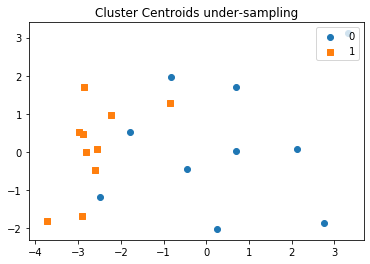

In [52]:
from imblearn.under_sampling import ClusterCentroids

cc = ClusterCentroids(ratio={0:10})

X_cc ,y_cc = cc.fit_sample(X,y)

plot_2d_space(X_cc, y_cc, 'Cluster Centroids under-sampling')

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


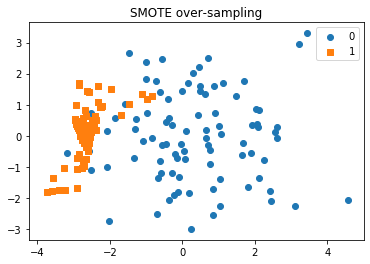

In [53]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(ratio='minority')
X_sm, y_sm = smote.fit_sample(X,y)

plot_2d_space(X_sm, y_sm, 'SMOTE over-sampling')

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


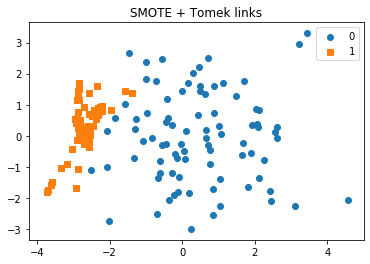

In [54]:
from imblearn.combine import SMOTETomek

smt = SMOTETomek(ratio='auto')
X_smt, y_smt = smt.fit_sample(X,y)

plot_2d_space(X_smt, y_smt, 'SMOTE + Tomek links')